# Домашнее задание №3

### Феоктистова Эмма
### 2 курс 3 группа ФиКЛ
#### К 24.10.20

### Пункт 1

Прочитаем наш файл с книгой.
Преобразуем текст в формат: только леммы, без знаков препинания, все в нижнем регистре, каждое предложение на отдельной строчке. Создадим новый файл, в который запишем полученные предложения:

In [2]:
import re
from nltk import tokenize
from pymystem3 import Mystem
m = Mystem()

with open('lostworld.txt', encoding='utf-8') as file:
    text = file.read()
    text = text.lower()

with open('cleaned_lw.txt', 'w', encoding='utf-8') as file:
    sentences = tokenize.sent_tokenize(text)
    pattern1 = ' +'
    pattern2 = '[,.?!-/...]'
    for s in sentences:
        s = re.sub(pattern1, ' ', s)
        s = re.sub(pattern2, '', s)
        lemmas = m.lemmatize(s)
        lemmas = ''.join(lemmas)
        file.write(lemmas)


### Пункт 2

Обучим нашу модель:

In [3]:
import gensim

file = 'cleaned_lw.txt'
data = gensim.models.word2vec.LineSentence(file)
model_lw = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter=50)

In [4]:
print('Слов в модели:', len(model_lw.wv.vocab))

Слов в модели: 1792


In [5]:
print(sorted([w for w in model_lw.wv.vocab]))

['а', 'адрес', 'аист', 'альбом', 'амазонка', 'америка', 'американец', 'американский', 'английский', 'англия', 'аплодисменты', 'аппарат', 'аспидночерный', 'атака', 'аудитория', 'ах', 'б', 'бабочка', 'базальтовый', 'бамбук', 'бамбуковый', 'банка', 'барабан', 'бас', 'бегство', 'беда', 'бедняга', 'бежать', 'без', 'бездна', 'безобидный', 'безобразие', 'безусловно', 'белый', 'берег', 'беседа', 'бесполезный', 'бинокль', 'битва', 'благодарность', 'благодаря', 'блеснуть', 'блестящий', 'близкий', 'близко', 'бог', 'богатый', 'боевой', 'боже', 'бой', 'бок', 'более', 'болото', 'боль', 'больше', 'больший', 'большой', 'борода', 'борьба', 'бояться', 'бред', 'бровь', 'бросать', 'бросаться', 'будто', 'будущий', 'буквально', 'бумага', 'бурный', 'бы', 'бывать', 'было', 'быстро', 'быть', 'в', 'важный', 'валяться', 'ваш', 'вверх', 'вглядываться', 'вдали', 'вдоль', 'вдруг', 'ведь', 'вейсман', 'век', 'великий', 'великолепный', 'величественный', 'величина', 'веревка', 'верить', 'верно', 'вернуться', 'верный', 

### Пункт 3

#### _Пункт 3.1_:
а) Выведем 5 ближайших слов для частотного союза _'а'_:

In [6]:
model_lw.wv.most_similar("а", topn=5)

[('сначала', 0.5755279064178467),
 ('идти', 0.5734481811523438),
 ('спасать', 0.44370022416114807),
 ('часовой', 0.42363089323043823),
 ('повиноваться', 0.4159165024757385)]

б) Выведем 5 ближайших слов для абстрактного понятия _'любовь'_:

In [7]:
model_lw.wv.most_similar("любовь", topn=5)

[('мужчина', 0.820957601070404),
 ('ознакомляться', 0.8028438091278076),
 ('истинный', 0.8024759292602539),
 ('бывать', 0.788398027420044),
 ('лжец', 0.7819290161132812)]

в) Выведем 5 ближайших слов для имени главного героя _'челленджер'_:

In [8]:
model_lw.wv.most_similar("челленджер", topn=5)

[('саммерля', 0.7904132604598999),
 ('знаменитый', 0.7107104063034058),
 ('грозный', 0.7084172964096069),
 ('иллингворт', 0.6565958261489868),
 ('ответ', 0.6551932692527771)]

г) Выведем 5 ближайших слов для прилагательных _'известный'_ и _'неизвестный'_ (встретилось много синонимов и антонимов):

In [9]:
model_lw.wv.most_similar(positive=['известный', 'неизвестный'], topn=5)

[('благодаря', 0.8826519250869751),
 ('необычный', 0.8255703449249268),
 ('явно', 0.808169960975647),
 ('доисторический', 0.8051211833953857),
 ('зоология', 0.8018572330474854)]

#### _Пункт 3.2_:
Семантическая пропорция слов _'мистер'_ и _'женщина'_ (просто интересно посмотреть):

In [28]:
print(model_lw.wv.most_similar(positive=["мистер", "мужчина"], negative=['женщина'])[0])

('лектор', 0.6443533897399902)


#### _Пункт 3.3_:
Найти лишнее в списке слов:

In [11]:
model_lw.wv.doesnt_match("птица ящер любовь змея".split())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'любовь'

### Пункт 4

#### _Пункт 4.1_:

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
words = ["челленджер", "саммерля", "самбо", "рокстон", "глэдис"]
X = model_lw[words]

<ipython-input-13-a6a8dc5abeb0>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_lw[words]


In [14]:
pca = PCA(n_components=2)
pca.fit(model_lw[list(model_lw.wv.vocab)])
coords = pca.transform(model_lw[words])

<ipython-input-14-a82a6682a1ae>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  pca.fit(model_lw[list(model_lw.wv.vocab)])
<ipython-input-14-a82a6682a1ae>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  coords = pca.transform(model_lw[words])


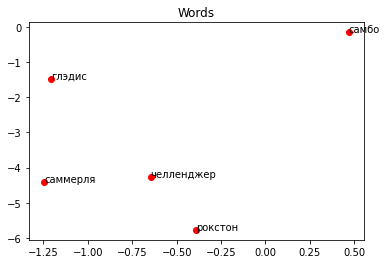

In [15]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

_**Пункт 4.2:**_

In [16]:
animals = ["игуанодон", "человекообезьяна", "ящер", "птица", "обезьяна"]
X = model_lw[animals]

<ipython-input-16-999d2d06a9d9>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_lw[animals]


In [17]:
pca = PCA(n_components=2)
pca.fit(model_lw[list(model_lw.wv.vocab)])
coords = pca.transform(model_lw[animals])

<ipython-input-17-5127f01afa2d>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  pca.fit(model_lw[list(model_lw.wv.vocab)])
<ipython-input-17-5127f01afa2d>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  coords = pca.transform(model_lw[animals])


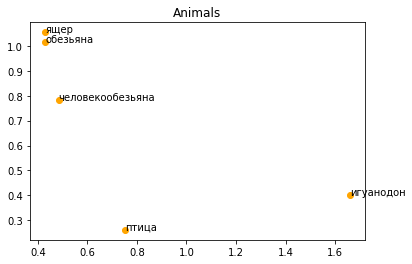

In [18]:
plt.scatter(coords[:, 0], coords[:, 1], color='orange')
plt.title('Animals')

for i, animal in enumerate(animals):
    plt.annotate(animal, xy=(coords[i, 0], coords[i, 1]))
plt.show()

_**Пункт 4.3:**_

In [19]:
parts = ['о', 'об', 'но', 'то']
X = model_lw[parts]

<ipython-input-19-021004661beb>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_lw[parts]


In [20]:
pca = PCA(n_components=2)
pca.fit(model_lw[list(model_lw.wv.vocab)])
coords = pca.transform(model_lw[parts])

<ipython-input-20-784de440e663>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  pca.fit(model_lw[list(model_lw.wv.vocab)])
<ipython-input-20-784de440e663>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  coords = pca.transform(model_lw[parts])


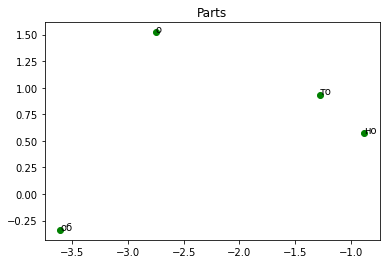

In [21]:
plt.scatter(coords[:, 0], coords[:, 1], color='green')
plt.title('Parts')

for i, part in enumerate(parts):
    plt.annotate(part, xy=(coords[i, 0], coords[i, 1]))
plt.show()

### Пункт 5

Возьмем любое предложение из текста и заменим каждое слово на ближайшее по вектору. Для этого преобразуем предложение в нужный нам формат:

In [22]:
import re
from pymystem3 import Mystem
m = Mystem()

with open('lostworld.txt', encoding='utf-8') as file:
    text = file.read()
    sentences = tokenize.sent_tokenize(text)
    sentence = sentences[40].lower()
    s = re.sub(' +', ' ', sentence)
    s = re.sub('[,.?!-/...]', '', s)
    lemmas = m.lemmatize(s)
    sentence = ''.join(lemmas)
    print(sentence)

вы совсем не ценить что вот мы  молодой мужчина и молодой женщина  мочь так непринужденный говорить друг с друг



Затем добавим в один список ближайшие по векторам слова, если таких нет, то оставим прочерк:

In [23]:
new_sen = []
for word in sentence.split():
    if word in model_lw.wv.vocab:
        for i in model_lw.most_similar(positive=[word], topn=1):
            # слово + коэффициент косинусной близости
            new_word = i[0]
        new_sen.append(new_word)
    else:
        new_sen.append('-')
    
s = ' '.join(new_sen)
s

<ipython-input-23-5020c4149e3b>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  for i in model_lw.most_similar(positive=[word], topn=1):


'разрешать гдеть кроме - как ясный туда глина лжец потрясать глина мужчина никогда действовать - упоминать юный занимать юный'

Выведем начальное предложение и полученное:

In [24]:
print(sentence, '|\n', 'V\n', s)

вы совсем не ценить что вот мы  молодой мужчина и молодой женщина  мочь так непринужденный говорить друг с друг
 |
 V
 разрешать гдеть кроме - как ясный туда глина лжец потрясать глина мужчина никогда действовать - упоминать юный занимать юный
